<a href="https://colab.research.google.com/github/anurag750/DataScience_Project/blob/main/Copy_of_Copy_of_ML_Project_TCET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The DataSets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')
y = dataset.iloc[:,:-1].values #independent variable

# Checking For Missing Values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Analysing the Data

In [ ]:
print(dataset.head())

     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]


In [ ]:
print(y)

[['ham']
 ['ham']
 ['spam']
 ...
 ['ham']
 ['ham']
 ['ham']]


In [ ]:
ham = dataset[dataset['Category'] == 'ham'] 
spam = dataset[dataset['Category'] == 'spam'] 
length = [len(ham),len(spam)]
print(length)

[4825, 748]


# Visualizing The Data

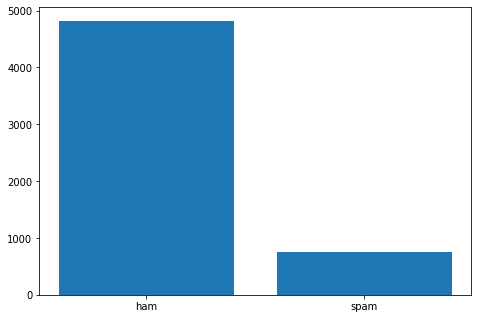

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
students = ['ham','spam']
ax.bar(students,length)
plt.show()

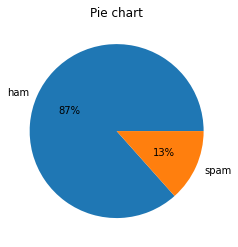

In [ ]:
count_Class=pd.value_counts(dataset["Category"], sort= True)
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
from collections import Counter
count1 = Counter(" ".join(dataset[dataset['Category']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(dataset[dataset['Category']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

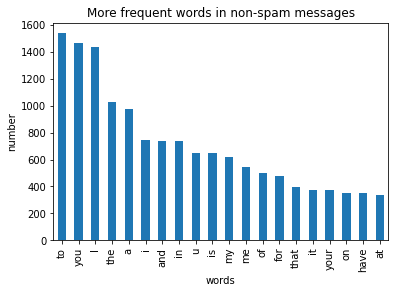

In [ ]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

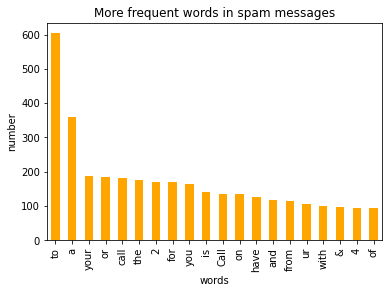

In [ ]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# Label Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y=y.reshape(len(y),1)
print(y)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


#  Cleaning the texts and steming it 

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 5572):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Message'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother not like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis w

# Creating the Bag of Words model



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=all_stopwords, max_features = 1000)
print(vectorizer)
X = vectorizer.fit_transform(corpus).toarray()
print(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ..

# Creating a DocumentTermMatrix

In [ ]:
df2 = pd.DataFrame(X.transpose(),
                   index=vectorizer.get_feature_names())
print(df2)

           0     1     2     3     4     ...  5567  5568  5569  5570  5571
abiola      0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
abl         0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
abt         0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
ac          0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
accept      0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
...         ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
yesterday   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
yet         0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
yo          0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
yr          0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
yup         0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0

[1000 rows x 5572 columns]


# Making a WordCloud from Corpus Data

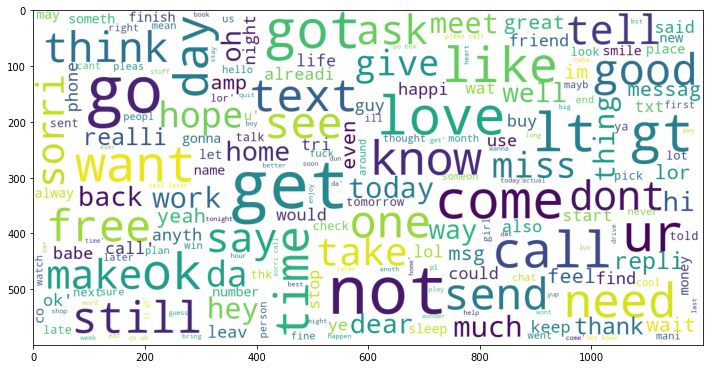

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = all_stopwords

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=all_stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))

    plt.imshow(wordcloud)

show_wordcloud(corpus)

# Applying KMeans Clustering Algorithm

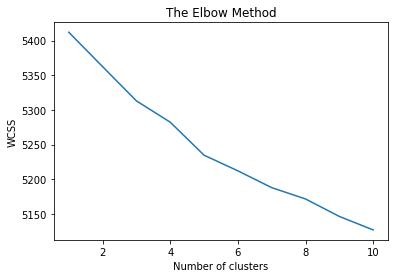

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters = i, init="k-means++", random_state=42)
  k_means.fit(X)
  wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
from sklearn.cluster import MiniBatchKMeans
cls = MiniBatchKMeans(n_clusters=5, random_state=0)
cls.fit(X)
cls.predict(X)
cls.labels_

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

NameError: ignored

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

In [ ]:
#AUC-ROC
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

# Linear dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X)
print(reduced_features)
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

[[-0.04945257 -0.01640431]
 [-0.11243148  0.30399713]
 [ 0.03281393 -0.02463325]
 ...
 [-0.01130752 -0.01362887]
 [-0.00751028 -0.03554962]
 [-0.01618189 -0.02485986]]


# Visualizing The Clusters

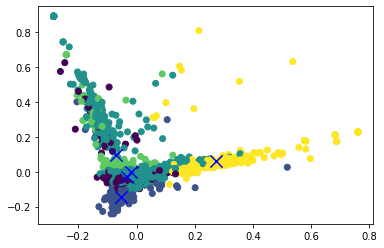

In [ ]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Splitting The Dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

## Testing different Models

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=log_reg.predict(x_test)
print(y_pred)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

[0 0 0 ... 0 0 0]


0.9713004484304932

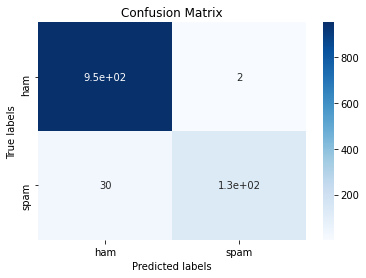

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

In [ ]:
#Adjusted R square
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(y_train,x_train)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              31.10
Date:                Wed, 27 May 2020   Prob (F-statistic):                        0.00
Time:                        17:44:17   Log-Likelihood:                          3323.9
No. Observations:                4457   AIC:                                     -4648.
Df Residuals:                    3457   BIC:                                      1754.
Df Model:                        1000                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.028699551569506727

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.96948118, 0.98484848])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.98348813, 0.89041096])

In [ ]:
#AUC-ROC
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.9052028795811518

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = Classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[954   1]
 [ 26 134]]


0.9757847533632287

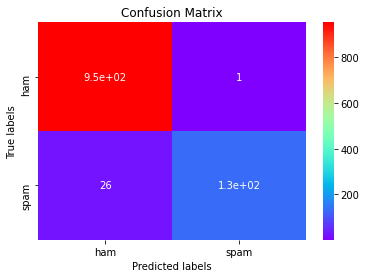

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='rainbow'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.028699551569506727

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.97346939, 0.99259259])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.98604651, 0.90847458])

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.9182264397905758

#Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
clas=GaussianNB()
clas.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=clas.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[726  10]
 [229 150]]


0.7856502242152467

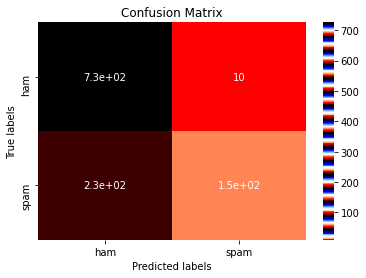

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='flag'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.21434977578475337

In [ ]:

# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.98641304, 0.39577836])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.85866351, 0.55658627])

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.8488547120418848

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[953  83]
 [  2  77]]


0.9237668161434978

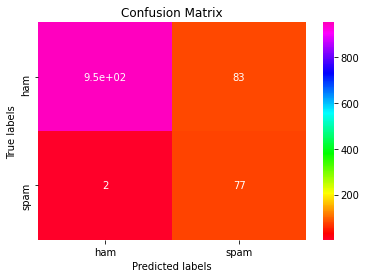

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='gist_rainbow'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.07623318385650224

In [ ]:

# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.91988417, 0.97468354])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.95730789, 0.64435146])

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.7395778795811518

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svmclassifier = SVC(kernel = 'linear', random_state = 0)
svmclassifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svmclassifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[953   2]
 [ 16 144]]


0.9838565022421525

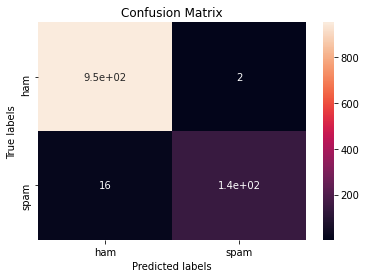

In [ ]:
 import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.016143497757847534

In [ ]:
#F1-score max-1 min-0
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.99064449, 0.94117647])

In [ ]:

# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.98348813, 0.98630137])

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.9489528795811517

## Selected support Vector Machine Classifier

# Prediction on Manual Inputs

In [ ]:
p = [input("enter a string::")]
p = vectorizer.transform(p).toarray()
print(p)

enter a string::this is lamce
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 

In [ ]:
print(p.shape[1], X.shape[1])

1000 1000


In [ ]:
if svmclassifier.predict(p) == 0:
  print("Not Spam")
else :
  print(Spam)

Not Spam
